You are given a 2D binary array grid. You need to find 3 non-overlapping rectangles having non-zero areas with horizontal and vertical sides such that all the 1's in grid lie inside these rectangles.

Return the minimum possible sum of the area of these rectangles.

Note that the rectangles are allowed to touch.

 

Example 1:

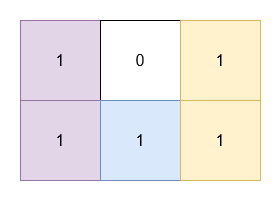

Input: grid = [[1,0,1],[1,1,1]]

Output: 5

Explanation:

    The 1's at (0, 0) and (1, 0) are covered by a rectangle of area 2.
    The 1's at (0, 2) and (1, 2) are covered by a rectangle of area 2.
    The 1 at (1, 1) is covered by a rectangle of area 1.

Example 2:

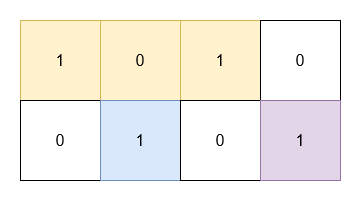

Input: grid = [[1,0,1,0],[0,1,0,1]]

Output: 5

Explanation:

    The 1's at (0, 0) and (0, 2) are covered by a rectangle of area 3.
    The 1 at (1, 1) is covered by a rectangle of area 1.
    The 1 at (1, 3) is covered by a rectangle of area 1.

 

Constraints:

    1 <= grid.length, grid[i].length <= 30
    grid[i][j] is either 0 or 1.
    The input is generated such that there are at least three 1's in grid.



In [ ]:
class Solution:
    def minimumSum2(
        self, grid: List[List[int]], u: int, d: int, l: int, r: int
    ) -> int:
        min_i = len(grid)
        max_i = 0
        min_j = len(grid[0])
        max_j = 0

        for i in range(u, d + 1):
            for j in range(l, r + 1):
                if grid[i][j] == 1:
                    min_i = min(min_i, i)
                    min_j = min(min_j, j)
                    max_i = max(max_i, i)
                    max_j = max(max_j, j)

        return (
            (max_i - min_i + 1) * (max_j - min_j + 1)
            if min_i <= max_i
            else sys.maxsize // 3
        )

    def rotate(self, vec: List[List[int]]) -> List[List[int]]:
        n = len(vec)
        m = len(vec[0]) if n > 0 else 0
        ret = [[0] * n for _ in range(m)]

        for i in range(n):
            for j in range(m):
                ret[m - j - 1][i] = vec[i][j]

        return ret

    def solve(self, grid: List[List[int]]) -> int:
        n = len(grid)
        m = len(grid[0]) if n > 0 else 0
        res = n * m

        # Shape
        # *** **
        # *** **
        # ***
        # *** **
        for i in range(n - 1):
            for j in range(m - 1):
                res = min(
                    res,
                    self.minimumSum2(grid, 0, i, 0, m - 1)
                    + self.minimumSum2(grid, i + 1, n - 1, 0, j)
                    + self.minimumSum2(grid, i + 1, n - 1, j + 1, m - 1),
                )

                res = min(
                    res,
                    self.minimumSum2(grid, 0, i, 0, j)
                    + self.minimumSum2(grid, 0, i, j + 1, m - 1)
                    + self.minimumSum2(grid, i + 1, n - 1, 0, m - 1),
                )

        # Shape
        # ** ** **
        # ** ** **
        # ** ** **
        # ** ** **
        for i in range(n - 2):
            for j in range(i + 1, n - 1):
                res = min(
                    res,
                    self.minimumSum2(grid, 0, i, 0, m - 1)
                    + self.minimumSum2(grid, i + 1, j, 0, m - 1)
                    + self.minimumSum2(grid, j + 1, n - 1, 0, m - 1),
                )

        return res

    def minimumSum(self, grid: List[List[int]]) -> int:
        rgrid = self.rotate(grid)
        return min(self.solve(grid), self.solve(rgrid))